In [4]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


# Data

In [65]:
# Import some data to play with
iris = datasets.load_iris()
x_data = iris.data
y_data = iris.target

# Binarize the output
y_data = label_binarize(y_data, classes=[0, 1, 2])
n_classes = y_data.shape[1]
print('x_data without noise:', x_data.shape)


# 노이즈 추가 (800개의 noise feature를 원래 데이터에 더 추가한다)
random_state = np.random.RandomState(0)
n_sample, n_feature = x_data.shape
x_data = np.c_[x_data, random_state.randn(n_sample, 200 * n_feature)]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=.5, random_state=0)

print('x_data with noise   :', x_data.shape)
print('number of classes   :', n_classes)

print('x_train:', x_train.shape)
print('x_test :', x_test.shape)
print('y_train:', y_train.shape)
print('y_test :', y_test.shape)

x_data without noise: (150, 4)
x_data with noise   : (150, 804)
number of classes   : 3
x_train: (75, 804)
x_test : (75, 804)
y_train: (75, 3)
y_test : (75, 3)


# Model

In [69]:
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
clf = clf.fit(x_train, y_train)

y_score = clf.decision_function(x_test)
y_score[:5]

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214]])

# Evaluate


## Scikit Learn

In [231]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

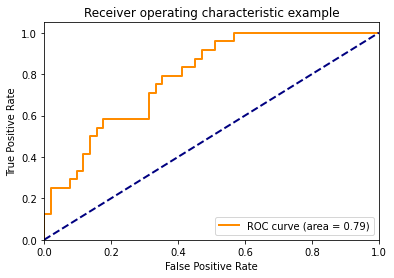

In [232]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()